**Question 1: MNIST Classification**

Importing library files, disabling warnings and reading the MNIST dataset

In [69]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Defining number of nodes in the five hidden layers:

In [0]:
n_nodes_h1 = 1024
n_nodes_h2 = 1024
n_nodes_h3 = 1024
n_nodes_h4 = 1024
n_nodes_h5 = 1024

Citation: Took help from sentdex videos (Youtube channel) for defining a basic neural network model 

Defining the neural network model with Xavier Initializer for the weights and Zero initializer for the bias. Optimizer used is Adam Optimizer and ReLU is used as an activation function for all the five hidden layers.

Once the neural network has been trained on the MNIST train images, a feed-forward has been done on the test images and each row will contain 10 random images for one class. The first row will contain images that will be classified as class 0, the second row as class 1 and so on.

However, in the next scenario, we are pulling out the results for the second to last layer of the network which has 1024 nodes out of which only 10 random features are being displayed. This is why not all the important features can be captured in those 10 features. Besides even in those 10 features there might be unimportant features which explains the empty or nearly empty rows in the second diagram.

The ideal situation would be if the 10 random features that are picked from the 1024 features all happen to be the most important features.

Epoch 1 completed out of 10 loss: 46.10732630640268 Accuracy: 0.9639
Epoch 2 completed out of 10 loss: 16.606400724500418 Accuracy: 0.9714
Epoch 3 completed out of 10 loss: 11.879882022738457 Accuracy: 0.9769
Epoch 4 completed out of 10 loss: 8.145922487135977 Accuracy: 0.9756
Epoch 5 completed out of 10 loss: 7.357370084151626 Accuracy: 0.9776
Epoch 6 completed out of 10 loss: 6.5535293247085065 Accuracy: 0.974
Epoch 7 completed out of 10 loss: 4.905212623649277 Accuracy: 0.981
Epoch 8 completed out of 10 loss: 4.20935087336693 Accuracy: 0.9791
Epoch 9 completed out of 10 loss: 3.681747760332655 Accuracy: 0.9817
Epoch 10 completed out of 10 loss: 3.593250409234315 Accuracy: 0.9792


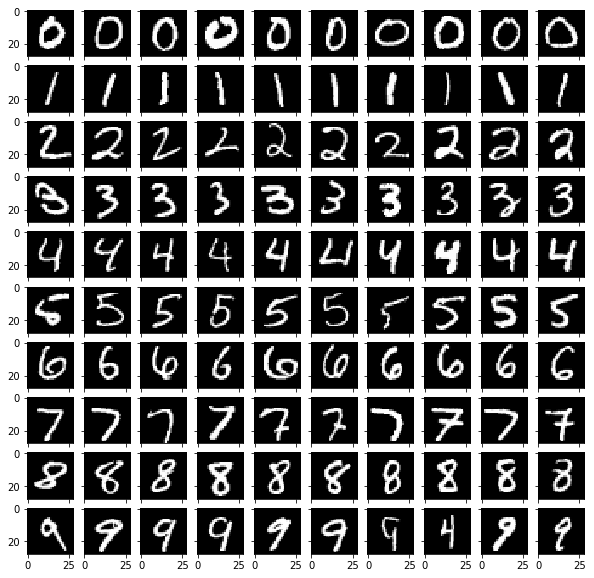

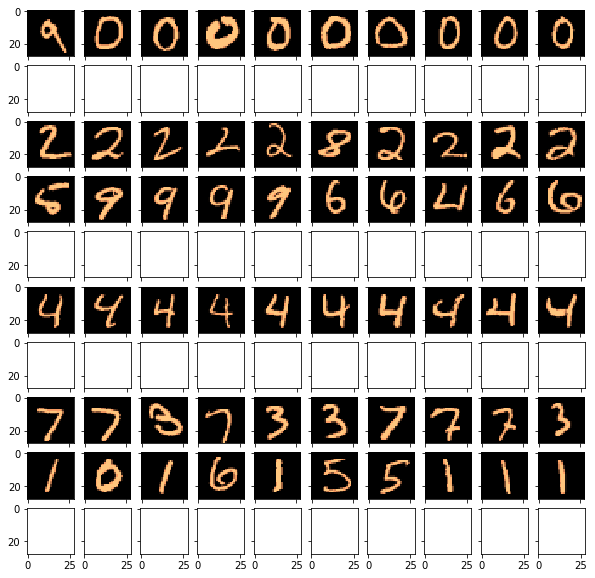

In [53]:
n_classes = 10
batch_size = 300

#height x weight
x = tf.placeholder('float',[None, 784])
y = tf.placeholder('float')
initializer = tf.contrib.layers.xavier_initializer()
bias_init = tf.zeros_initializer()

input_dim = 784

def neural_network_model(data):
  
    hidden_1_layer = {'weights': tf.Variable(initializer([input_dim,n_nodes_h1])),
                     'biases': tf.Variable(bias_init([n_nodes_h1]))}
    
    hidden_2_layer = {'weights': tf.Variable(initializer([n_nodes_h1,n_nodes_h2])),
                     'biases': tf.Variable(bias_init([n_nodes_h2]))}
    
    hidden_3_layer = {'weights': tf.Variable(initializer([n_nodes_h2,n_nodes_h3])),
                     'biases': tf.Variable(bias_init([n_nodes_h3]))}
    
    hidden_4_layer = {'weights': tf.Variable(initializer([n_nodes_h3,n_nodes_h4])),
                     'biases': tf.Variable(bias_init([n_nodes_h4]))}
    
    hidden_5_layer = {'weights': tf.Variable(initializer([n_nodes_h4,n_nodes_h5])),
                     'biases': tf.Variable(bias_init([n_nodes_h5]))}
    
    output_layer = {'weights': tf.Variable(initializer([n_nodes_h5,n_classes])),
                     'biases': tf.Variable(bias_init([n_classes]))}
    
    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']),hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)
    
    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']),hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)
    
    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']),hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)
    
    l4 = tf.add(tf.matmul(l3,hidden_4_layer['weights']),hidden_4_layer['biases'])
    l4 = tf.nn.relu(l4)
    
    l5 = tf.add(tf.matmul(l4,hidden_5_layer['weights']),hidden_5_layer['biases'])
    l5 = tf.nn.relu(l5)
    
    output = tf.matmul(l5,output_layer['weights']) + output_layer['biases']
    
    return l1,l2,l3,l4,l5,output
  
def train_neural_network(x):
  
  global last_layer
  global first_layer
  global second_layer
  global third_layer
  global fourth_layer
  global fifth_layer
  global test_images
  
  prediction_l1,prediction_l2,prediction_l3,prediction_l4,prediction_l5,prediction = neural_network_model(x)
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = prediction,labels = y))
  optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
  
  hm_epochs = 10
  
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(hm_epochs):
      epoch_loss = 0
      
      for _ in range(int(mnist.train.num_examples/batch_size)):
        epoch_x, epoch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict = {x: epoch_x, y: epoch_y})
        epoch_loss += c
      
      correct = tf.equal(tf.argmax(prediction,1), tf.argmax(y,1))
      accuracy = tf.reduce_mean(tf.cast(correct,'float'))
        
      print('Epoch', epoch+1, 'completed out of', hm_epochs, 'loss:', epoch_loss, 'Accuracy:', accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))
      
    #The neural network has been trained, now we have to print softmax output for 1000 test images
    
    test_images = mnist.test.images[0:1000]
    last_layer = sess.run(prediction,feed_dict = {x:test_images})
    index_dictionary = {}
    
    for i in range(0,1000):
      
      if np.argmax(last_layer[i]) in index_dictionary.keys():
        index_dictionary[np.argmax(last_layer[i])] = index_dictionary[np.argmax(last_layer[i])] + [i]
      else:
        index_dictionary[np.argmax(last_layer[i])] = [i]
    
    sorted(index_dictionary.keys())
    
    fig, ax = plt.subplots(10,10, sharex = True, sharey = True, figsize = (10,10))
    
    for j in index_dictionary.keys():
      for k in range(0,10):
        image = test_images[index_dictionary[j][k]]
        image = np.array(image)
        pixels = image.reshape((28, 28))
        ax[j][k].imshow(pixels, cmap='gray')
        
    #Solving the next problem using the second last layer - fifth hidden layer
    
    first_layer = sess.run(prediction_l1,feed_dict = {x:test_images})
    second_layer = sess.run(prediction_l2,feed_dict = {x:test_images})
    third_layer = sess.run(prediction_l3,feed_dict = {x:test_images})
    fourth_layer = sess.run(prediction_l4,feed_dict = {x:test_images})
    fifth_layer = sess.run(prediction_l5,feed_dict = {x:test_images})
    fifth_layer_subset = fifth_layer[:,0:10]
    index_dictionary = {}
    
    for i in range(0,1000):
      
      if np.argmax(fifth_layer_subset[i]) in index_dictionary.keys():
        index_dictionary[np.argmax(fifth_layer_subset[i])] = index_dictionary[np.argmax(fifth_layer_subset[i])] + [i]
      else:
        index_dictionary[np.argmax(fifth_layer_subset[i])] = [i]
    
    sorted(index_dictionary.keys())
    
    fig, ax = plt.subplots(10,10, sharex = True, sharey = True, figsize = (10,10))
    
    for j in index_dictionary.keys():
      for k in range(0,10):
        if(len(index_dictionary[j]) < 10):
          break
        else:
          image = test_images[index_dictionary[j][k]]
          image = np.array(image)
          pixels = image.reshape((28, 28))
          ax[j][k].imshow(pixels, cmap='copper')
        
train_neural_network(x)    

Peforming a tSNE and PCA on the test images will make the classification representable in a 2 dimensional graph. The PCA will try to minimize the number of dimensions so that each component is different from the other in terms of maximum variance explained. However, if there are 784 pixels being reduced to 2 dimensions then although the two principal component axes have the maximum varaiance, the definition of the axes can be based on unimportant features as well. That is why it is not easy to classify the images in two dimensions.

tSNE gives a better division of classes as opposed to PCA because tSNE focuses more on small pairwise distances or local similarity to separate the classes.

If the output is taken from the first layer, it doesn't classify very well. The performance slowly improves when the number of layers increases. Perhaps, this is one way to figure out if 5 hidden layers is good enough or does it overfit.

However, tSNE is proven to be better to classify handwritten digits. PCA might be better in other use cases.

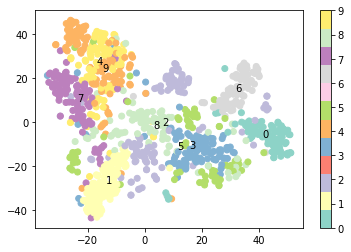

In [55]:
#TSNE on Test Images

X_fitted = TSNE(n_components = 2).fit_transform(test_images)
X1_subset = []
X2_subset = []
Y_subset = []

for i in range(0,1000):
  Y_subset.append(np.argmax(last_layer[i]))
  X1_subset.append(X_fitted[i][0])
  X2_subset.append(X_fitted[i][1])
  
data = {'X1':X1_subset, 'X2':X2_subset, 'Y':Y_subset }
df = pd.DataFrame(data)
  
plt.scatter(X1_subset,X2_subset,c=Y_subset,cmap = "Set3")
for i,j in df.groupby(['Y']).mean().iterrows():
  plt.annotate(i,(j['X1'],j['X2']))
plt.colorbar()
plt.show()


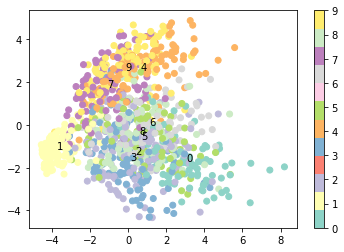

In [56]:
#PCA on Test Images

X_fitted = PCA(n_components = 2).fit_transform(test_images)
X1_subset = []
X2_subset = []
Y_subset = []

for i in range(0,1000):
  Y_subset.append(np.argmax(last_layer[i]))
  X1_subset.append(X_fitted[i][0])
  X2_subset.append(X_fitted[i][1])
  
data = {'X1':X1_subset, 'X2':X2_subset, 'Y':Y_subset }
df = pd.DataFrame(data)
  
plt.scatter(X1_subset,X2_subset,c=Y_subset,cmap = "Set3")
for i,j in df.groupby(['Y']).mean().iterrows():
  plt.annotate(i,(j['X1'],j['X2']))
plt.colorbar()  
plt.show()


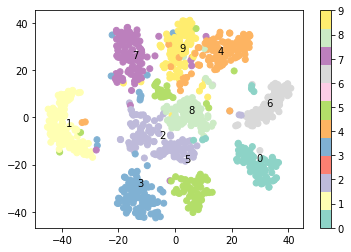

In [57]:
#TSNE on First Layer

X_fitted = TSNE(n_components = 2).fit_transform(first_layer)
X1_subset = []
X2_subset = []
Y_subset = []

for i in range(0,1000):
  Y_subset.append(np.argmax(last_layer[i]))
  X1_subset.append(X_fitted[i][0])
  X2_subset.append(X_fitted[i][1])
  
data = {'X1':X1_subset, 'X2':X2_subset, 'Y':Y_subset }
df = pd.DataFrame(data)
  
plt.scatter(X1_subset,X2_subset,c=Y_subset,cmap = "Set3")
for i,j in df.groupby(['Y']).mean().iterrows():
  plt.annotate(i,(j['X1'],j['X2']))
plt.colorbar()
plt.show()


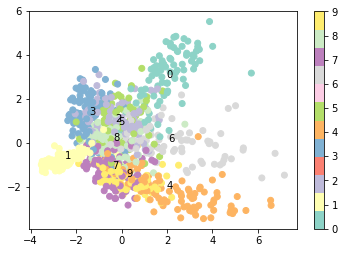

In [58]:
#PCA on First Layer

X_fitted = PCA(n_components = 2).fit_transform(first_layer)
X1_subset = []
X2_subset = []
Y_subset = []

for i in range(0,1000):
  Y_subset.append(np.argmax(last_layer[i]))
  X1_subset.append(X_fitted[i][0])
  X2_subset.append(X_fitted[i][1])
  
data = {'X1':X1_subset, 'X2':X2_subset, 'Y':Y_subset }
df = pd.DataFrame(data)
  
plt.scatter(X1_subset,X2_subset,c=Y_subset,cmap = "Set3")
for i,j in df.groupby(['Y']).mean().iterrows():
  plt.annotate(i,(j['X1'],j['X2']))
plt.colorbar()  
plt.show()


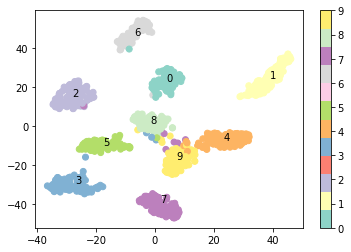

In [59]:
#TSNE on Second Layer

X_fitted = TSNE(n_components = 2).fit_transform(second_layer)
X1_subset = []
X2_subset = []
Y_subset = []

for i in range(0,1000):
  Y_subset.append(np.argmax(last_layer[i]))
  X1_subset.append(X_fitted[i][0])
  X2_subset.append(X_fitted[i][1])
  
data = {'X1':X1_subset, 'X2':X2_subset, 'Y':Y_subset }
df = pd.DataFrame(data)
  
plt.scatter(X1_subset,X2_subset,c=Y_subset,cmap = "Set3")
for i,j in df.groupby(['Y']).mean().iterrows():
  plt.annotate(i,(j['X1'],j['X2']))
plt.colorbar()
plt.show()


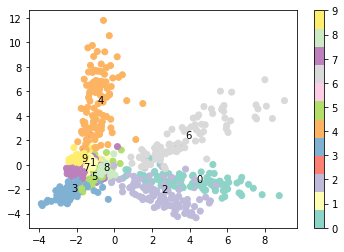

In [27]:
#PCA on Second Layer

X_fitted = PCA(n_components = 2).fit_transform(second_layer)
X1_subset = []
X2_subset = []
Y_subset = []

for i in range(0,1000):
  Y_subset.append(np.argmax(last_layer[i]))
  X1_subset.append(X_fitted[i][0])
  X2_subset.append(X_fitted[i][1])
  
data = {'X1':X1_subset, 'X2':X2_subset, 'Y':Y_subset }
df = pd.DataFrame(data)
  
plt.scatter(X1_subset,X2_subset,c=Y_subset,cmap = "Set3")
for i,j in df.groupby(['Y']).mean().iterrows():
  plt.annotate(i,(j['X1'],j['X2']))
plt.colorbar()
plt.show()


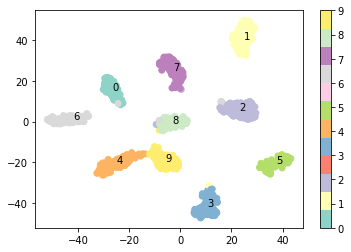

In [28]:
#TSNE on Third Layer

X_fitted = TSNE(n_components = 2).fit_transform(third_layer)
X1_subset = []
X2_subset = []
Y_subset = []

for i in range(0,1000):
  Y_subset.append(np.argmax(last_layer[i]))
  X1_subset.append(X_fitted[i][0])
  X2_subset.append(X_fitted[i][1])
  
data = {'X1':X1_subset, 'X2':X2_subset, 'Y':Y_subset }
df = pd.DataFrame(data)
  
plt.scatter(X1_subset,X2_subset,c=Y_subset,cmap = "Set3")
for i,j in df.groupby(['Y']).mean().iterrows():
  plt.annotate(i,(j['X1'],j['X2']))
plt.colorbar()
plt.show()


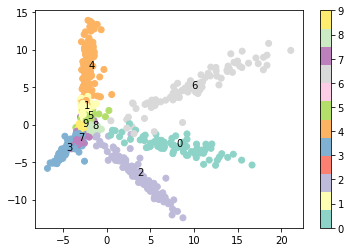

In [29]:
#PCA on Third Layer

X_fitted = PCA(n_components = 2).fit_transform(third_layer)
X1_subset = []
X2_subset = []
Y_subset = []

for i in range(0,1000):
  Y_subset.append(np.argmax(last_layer[i]))
  X1_subset.append(X_fitted[i][0])
  X2_subset.append(X_fitted[i][1])
  
data = {'X1':X1_subset, 'X2':X2_subset, 'Y':Y_subset }
df = pd.DataFrame(data)
  
plt.scatter(X1_subset,X2_subset,c=Y_subset,cmap = "Set3")
for i,j in df.groupby(['Y']).mean().iterrows():
  plt.annotate(i,(j['X1'],j['X2']))
plt.colorbar()
plt.show()


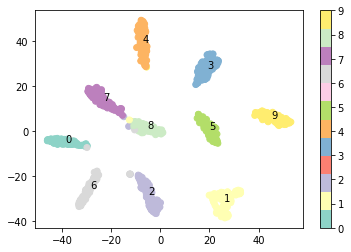

In [30]:
#TSNE on Fourth Layer

X_fitted = TSNE(n_components = 2).fit_transform(fourth_layer)
X1_subset = []
X2_subset = []
Y_subset = []

for i in range(0,1000):
  Y_subset.append(np.argmax(last_layer[i]))
  X1_subset.append(X_fitted[i][0])
  X2_subset.append(X_fitted[i][1])
  
data = {'X1':X1_subset, 'X2':X2_subset, 'Y':Y_subset }
df = pd.DataFrame(data)
  
plt.scatter(X1_subset,X2_subset,c=Y_subset,cmap = "Set3")
for i,j in df.groupby(['Y']).mean().iterrows():
  plt.annotate(i,(j['X1'],j['X2']))
plt.colorbar()
plt.show()


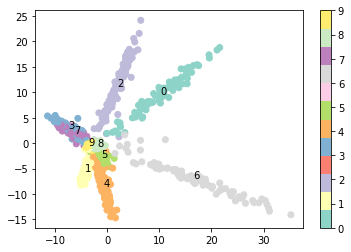

In [31]:
#PCA on Fourth Layer

X_fitted = PCA(n_components = 2).fit_transform(fourth_layer)
X1_subset = []
X2_subset = []
Y_subset = []

for i in range(0,1000):
  Y_subset.append(np.argmax(last_layer[i]))
  X1_subset.append(X_fitted[i][0])
  X2_subset.append(X_fitted[i][1])
  
data = {'X1':X1_subset, 'X2':X2_subset, 'Y':Y_subset }
df = pd.DataFrame(data)
  
plt.scatter(X1_subset,X2_subset,c=Y_subset,cmap = "Set3")
for i,j in df.groupby(['Y']).mean().iterrows():
  plt.annotate(i,(j['X1'],j['X2']))
plt.colorbar()
plt.show()


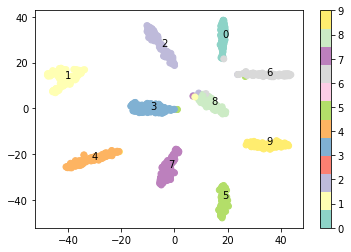

In [32]:
#TSNE on Fifth Layer

X_fitted = TSNE(n_components = 2).fit_transform(fifth_layer)
X1_subset = []
X2_subset = []
Y_subset = []

for i in range(0,1000):
  Y_subset.append(np.argmax(last_layer[i]))
  X1_subset.append(X_fitted[i][0])
  X2_subset.append(X_fitted[i][1])
  
data = {'X1':X1_subset, 'X2':X2_subset, 'Y':Y_subset }
df = pd.DataFrame(data)
  
plt.scatter(X1_subset,X2_subset,c=Y_subset,cmap = "Set3")
for i,j in df.groupby(['Y']).mean().iterrows():
  plt.annotate(i,(j['X1'],j['X2']))
plt.colorbar()
plt.show()


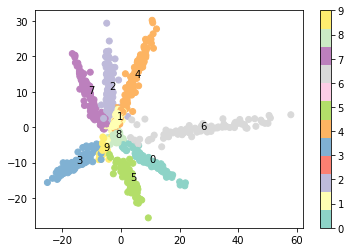

In [33]:
#PCA on Fifth Layer

X_fitted = PCA(n_components = 2).fit_transform(fifth_layer)
X1_subset = []
X2_subset = []
Y_subset = []

for i in range(0,1000):
  Y_subset.append(np.argmax(last_layer[i]))
  X1_subset.append(X_fitted[i][0])
  X2_subset.append(X_fitted[i][1])
  
data = {'X1':X1_subset, 'X2':X2_subset, 'Y':Y_subset }
df = pd.DataFrame(data)
  
plt.scatter(X1_subset,X2_subset,c=Y_subset,cmap = "Set3")
for i,j in df.groupby(['Y']).mean().iterrows():
  plt.annotate(i,(j['X1'],j['X2']))
plt.colorbar()
plt.show()


**Question 2: Speech Denoising**

Please note that I am mounting the drive so it might need a user authentication.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Installing librosa and loading the train audio files

In [0]:
#!pip install librosa
import librosa
s, sr=librosa.load('/content/drive/My Drive/data/train_clean_male.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load('/content/drive/My Drive/data/train_dirty_male.wav', sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)

Loading the test audio files as well

In [0]:
#Now that the network has been trained, let us load the test data

t, sr=librosa.load('/content/drive/My Drive/data/test_x_01.wav', sr=None)
X_test1=librosa.stft(t, n_fft=1024, hop_length=512)

t2, sr=librosa.load('/content/drive/My Drive/data/test_x_02.wav', sr=None)
X_test2=librosa.stft(t2, n_fft=1024, hop_length=512)

Transposing and taking the magnitude of the train and test signals

In [0]:
trans_X = np.transpose(X)
trans_S = np.transpose(S)
mag_X = np.abs(trans_X)
mag_S = np.abs(trans_S)

In [0]:
trans_X_test1 = np.transpose(X_test1)
trans_X_test2 = np.transpose(X_test2)
mag_X_test1 = np.abs(trans_X_test1)
mag_X_test2 = np.abs(trans_X_test2)

Training the neural network with a Xavier initializer for the weights and Zero initializer for the bias and using an Adam Optimizer with 5 hidden layers, we use the mean square error as the loss function. 100 epochs are being used.

A relu is not being used as an activation function in the output layer because the output to |X| is |S| which is always positive.

In [0]:
n_classes = 513

x = tf.placeholder('float',[None,513])
y = tf.placeholder('float',[None,513])
input_dim = 513

In [65]:
def train_neural_network(x):
  
  global final_layer
  global final_layer2
  global final_layer3
  
  prediction_l1,prediction_l2,prediction_l3,prediction_l4,prediction_l5,prediction = neural_network_model(x)
  cost = tf.reduce_mean(tf.square(prediction-y))
  optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
  
  hm_epochs = 100
  epoch_x = mag_X
  epoch_y = mag_S
  
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(hm_epochs):
      epoch_loss = 0
          
      _, c = sess.run([optimizer, cost], feed_dict = {x: epoch_x, y: epoch_y})
      epoch_loss += c
  
    print('Epoch', epoch+1, 'completed out of', hm_epochs, 'loss:', epoch_loss)
    
    final_layer = sess.run(prediction,feed_dict = {x:mag_X_test1})
    final_layer2 = sess.run(prediction,feed_dict = {x:mag_X_test2})
    final_layer3 = sess.run(prediction,feed_dict = {x:mag_X})
      
train_neural_network(x)

Epoch 100 completed out of 100 loss: 0.004716161172837019


Performing the calculations that includes the Hadamard product.

In [0]:
S_test1 = (np.transpose(trans_X_test1)/np.transpose(mag_X_test1))
S_test1 = np.multiply(S_test1,np.transpose(final_layer))

S_test2 = (np.transpose(trans_X_test2)/np.transpose(mag_X_test2))
S_test2 = np.multiply(S_test2,np.transpose(final_layer2))

S_test3 = (X/np.transpose(mag_X))
S_test3 = np.multiply(S_test3,np.transpose(final_layer3))

Reconstructing the test signal after training the Neural Network.

In [0]:
s_test1 = librosa.istft(S_test1, hop_length=512)
librosa.output.write_wav('test_s_01_recons.wav', s_test1, sr)

s_test2 = librosa.istft(S_test2, hop_length=512)
librosa.output.write_wav('test_s_02_recons.wav', s_test2, sr)

s_test3 = librosa.istft(S_test3, hop_length=512)
librosa.output.write_wav('test_s_03_recons.wav', s_test3, sr)

Computing the SNR of the train signal

In [68]:
size = np.shape(s_test3)[0]
s = s[: size]
num = np.dot(np.transpose(s),s)
den = np.dot(np.transpose(s - s_test3),(s - s_test3))
SNR = 10 * np.log10(num/den)
print('Value of SNR : ' + str(SNR))

Value of SNR : 13.399455547332764


Displaying the audio

In [43]:
import IPython.display as ipd
ipd.Audio('test_s_01_recons.wav')

In [0]:
ipd.Audio('test_s_02_recons.wav')